In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0)

/Users/david/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [4]:
# your code here
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [64]:
df['_STATE'].unique()

array(['Connecticut', 'New Jersey', 'New York'], dtype=object)

**The Data is already subsetted to only include those three states, since 9, 34, and 36 are the State codes for NJ, CT, and NY**

In [73]:
df['_STATE'].replace(9, 'Connecticut', inplace = True)
df['_STATE'].replace(34, 'New Jersey', inplace = True)
df['_STATE'].replace(36, 'New York', inplace = True)

Now check to see how large our subset df.

In [74]:
# your code here
df.shape

(34545, 364)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [75]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [76]:
# replace values not in 1:30 or 88 with nan
def physhlth_2(row):
    if row['PHYSHLTH'] in list(range(1,31)):
        return row['PHYSHLTH']-0
    elif row['PHYSHLTH'] == 88:
        return 0
    else:
        return np.nan
df['PHYSHLTH2'] = df.apply(lambda row: physhlth_2(row), axis = 1)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [77]:
# descriptive statistics
df['PHYSHLTH2'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH2, dtype: float64

In [78]:
# graphic showing those descriptive stats


Text(0.5, 0, 'Number of sick days')

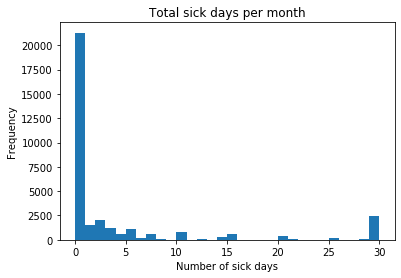

In [79]:
# graphic showing the distribution of data
df['PHYSHLTH2'].plot(kind = 'hist', bins = 30)
plt.title('Total sick days per month')
plt.xlabel('Number of sick days')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [80]:
# code to calculate the average number of sick days by state
avg_num_sick_days_by_state = df.groupby('_STATE')['PHYSHLTH2'].mean()
avg_num_sick_days_by_state

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH2, dtype: float64

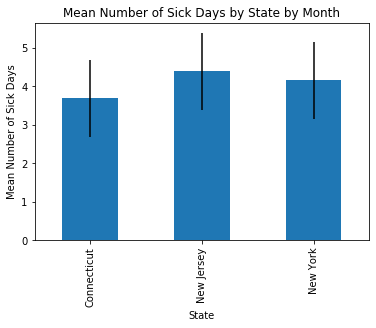

In [81]:
# code to graph those averages using matplotlib
avg_num_sick_days_by_state.plot(kind = 'bar', yerr = True)
plt.title('Mean Number of Sick Days by State by Month')
plt.xlabel('State')
plt.ylabel('Mean Number of Sick Days')
plt.show()

## 4. Turn the number of sick days into a classification of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [82]:
# code to create new column for chronically sick
def chronic_sick(row):
    if row['PHYSHLTH'] == 30:
        return 'Chronically Sick'
    else:
        return 'Not Chronically Sick'
df['Chronically_sick'] = df.apply(lambda row: chronic_sick(row), axis = 1)

In [83]:
Chron_Sick_Val = df['Chronically_sick'].value_counts(normalize = True)
Chron_Sick_Val

Not Chronically Sick    0.929425
Chronically Sick        0.070575
Name: Chronically_sick, dtype: float64

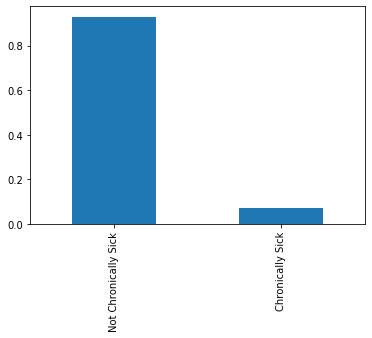

In [84]:
Chron_Sick_Val.plot(kind = 'bar')

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [123]:
# code to calculate averages per state
df_2 = df.loc[df['PHYSHLTH2'] >= 0]
df_2['PHYSHLTH2'].replace(list(range(1,31)), 1, inplace = True)
df_2['PHYSHLTH2'].unique()

/Users/david/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([0., 1.])

In [124]:
total_individuals = df_2.groupby('_STATE')['PHYSHLTH2'].count()
sick_individuals = df_2.groupby('_STATE')['PHYSHLTH2'].sum()

In [127]:
state_percentages = sick_individuals/total_individuals*100

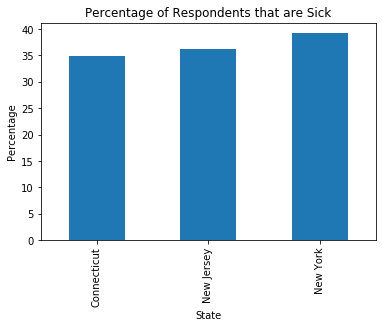

In [128]:
# create graphic to compare chronically sick by state
state_percentages.plot(kind = 'bar')
plt.title('Percentage of Respondents that are Sick')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.show()

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [89]:
# Recode variables
df['SMOKDAY2'].replace(1, 'Every Day', inplace = True)
df['SMOKDAY2'].replace(2, 'Some Days', inplace = True)
df['SMOKDAY2'].replace(3, 'Not at All', inplace = True)
df['SMOKDAY2'].replace([7,9], np.nan, inplace = True)
df['SMOKDAY2'].unique()

array([nan, 'Not at All', 'Every Day', 'Some Days'], dtype=object)

In [90]:
df['SMOKDAY2'].describe

<bound method NDFrame.describe of 49938            NaN
49939            NaN
49940            NaN
49941            NaN
49942     Not at All
             ...    
303774     Every Day
303775           NaN
303776    Not at All
303777           NaN
303778           NaN
Name: SMOKDAY2, Length: 34545, dtype: object>

In [91]:
df['SMOKDAY2'].isna().sum()
df['SMOKDAY2'].value_counts().sum()

13750

In [93]:
df_3 = df.loc[df['SMOKDAY2'].isin(['Every Day', 'Not at All', 'Some Days'])]
df_3['SMOKDAY2'].count()
df_3['SMOKE EVERY DAY'] = df_3.apply(lambda row: row.SMOKDAY2 == 'Every Day', axis = 1)

/Users/david/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


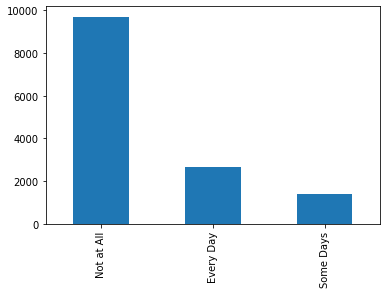

In [94]:
smoke_values = df_3['SMOKDAY2'].value_counts()
smoke_values.plot(kind = 'bar')

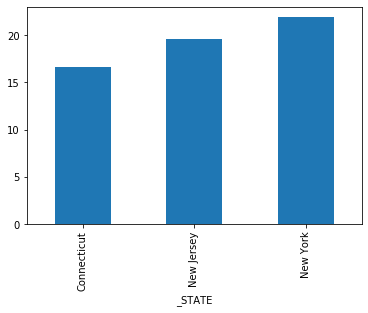

In [96]:
smoke_by_state = df_3.groupby('_STATE')['SMOKE EVERY DAY'].sum()/df_3.groupby('_STATE')['SMOKE EVERY DAY'].count()*100
smoke_by_state.plot(kind = 'bar')

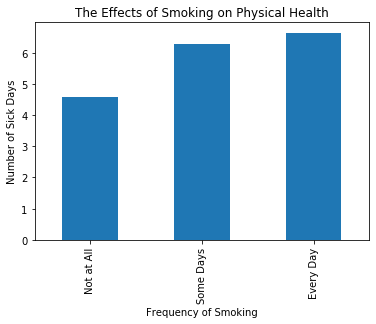

In [97]:
smoke_vs_physhlth = df_3.groupby('SMOKDAY2')['PHYSHLTH2'].mean().sort_values()
smoke_vs_physhlth.plot(kind = 'bar')
plt.xlabel('Frequency of Smoking')
plt.ylabel('Number of Sick Days')
plt.title('The Effects of Smoking on Physical Health')
plt.show()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [98]:
# Recode variables
df['ALCDAY5'].value_counts()


888.0    13043
201.0     3027
202.0     2324
101.0     1596
203.0     1350
102.0     1232
230.0     1164
205.0     1156
204.0     1144
210.0      840
103.0      782
107.0      710
220.0      650
215.0      590
206.0      389
104.0      386
208.0      369
105.0      352
207.0      278
225.0      265
777.0      225
999.0      201
212.0      144
106.0      109
228.0       56
214.0       53
229.0       31
209.0       28
227.0       24
218.0       19
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: ALCDAY5, dtype: int64

In [99]:
def alc_per_month(row):
    if 100<row['ALCDAY5']<108:
        return (row['ALCDAY5']-100)*30/7
    elif 200<row['ALCDAY5']<232:
        return row['ALCDAY5']-200
    elif row['ALCDAY5'] == 888:
        return 0
    else:
        return np.nan
df['Alc_per_month'] = df.apply(lambda row: alc_per_month(row), axis = 1)

In [100]:
df['Alc_per_month'].unique()

array([ 4.28571429, 30.        ,  0.        , 12.85714286, 17.14285714,
        4.        ,  5.        , 15.        ,  2.        ,  1.        ,
       20.        ,  3.        , 14.        ,  7.        ,  8.57142857,
       10.        ,         nan,  8.        , 21.42857143, 29.        ,
       27.        , 26.        , 16.        ,  6.        , 22.        ,
       25.        , 28.        , 13.        , 12.        , 24.        ,
       25.71428571, 18.        , 17.        , 21.        , 11.        ,
        9.        , 19.        , 23.        ])

In [101]:
df['Alc_per_month'].value_counts()

0.000000     13043
1.000000      3027
2.000000      2324
30.000000     1874
4.285714      1596
3.000000      1350
8.571429      1232
5.000000      1156
4.000000      1144
10.000000      840
12.857143      782
20.000000      650
15.000000      590
6.000000       389
17.142857      386
8.000000       369
21.428571      352
7.000000       278
25.000000      265
12.000000      144
25.714286      109
28.000000       56
14.000000       53
29.000000       31
9.000000        28
27.000000       24
18.000000       19
16.000000       15
26.000000       15
24.000000       14
21.000000       13
22.000000       13
13.000000       11
11.000000       10
17.000000        7
23.000000        2
19.000000        1
Name: Alc_per_month, dtype: int64

In [102]:
df['Alc_per_month'].describe()

count    32212.000000
mean         5.431707
std          8.386242
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: Alc_per_month, dtype: float64

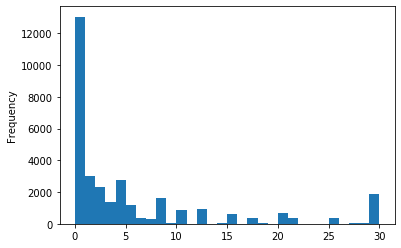

In [103]:
df['Alc_per_month'].plot(kind = 'hist', bins = 30)

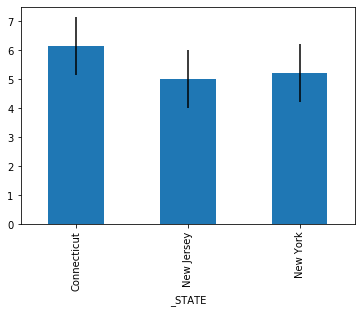

In [104]:
alc_by_state = df.groupby('_STATE')['Alc_per_month'].mean()
alc_by_state.plot(kind = 'bar', yerr = True)

In [105]:
df['PHYSHLTH2'].corr(df['Alc_per_month'])

-0.09093428887557914

In [106]:
def Alc_per_month_categories(row):
    if row['Alc_per_month']==0:
        return '0 days per month'
    elif 0<row['Alc_per_month']<=30:
        return 'Some days per month'
df['Alc_per_month_group'] = df.apply(lambda row: Alc_per_month_categories(row), axis = 1)


In [107]:
def PHYSHLTH_3(row):
    if 1<=row['PHYSHLTH2']<=30:
        return '>0'
    elif row['PHYSHLTH2'] == 0:
        return '0'
df['PHYSHLTH3'] = df.apply(lambda row: PHYSHLTH_3(row), axis = 1)

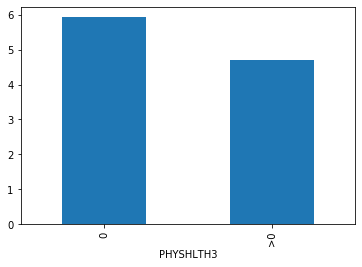

In [108]:
df.groupby('PHYSHLTH3')['Alc_per_month'].mean().plot(kind = 'bar')
plt.show()

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [109]:
my_list = list(df['GENHLTH'].unique())
my_list

[3.0, 4.0, 2.0, 1.0, 5.0, 9.0, 7.0]

In [110]:
my_list.pop()

7.0

In [111]:
my_list.pop()

9.0

In [112]:
my_list

[3.0, 4.0, 2.0, 1.0, 5.0]

In [113]:
# your code here
def GENHLTH_clean(row):
    if row['GENHLTH'] in my_list:
        return int(row['GENHLTH'])
    else:
        return np.nan
df['GENHLTH2'] = df.apply(lambda row: GENHLTH_clean(row), axis = 1)

In [114]:
df['GENHLTH2'].value_counts()

2.0    11476
3.0    10405
1.0     6498
4.0     4483
5.0     1584
Name: GENHLTH2, dtype: int64

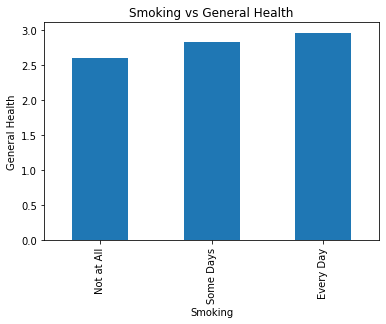

In [132]:
df.groupby('SMOKDAY2')['GENHLTH2'].mean().sort_values().plot(kind = 'bar')
plt.title('Smoking vs General Health')
plt.ylabel('General Health')
plt.xlabel('Smoking')
plt.show()

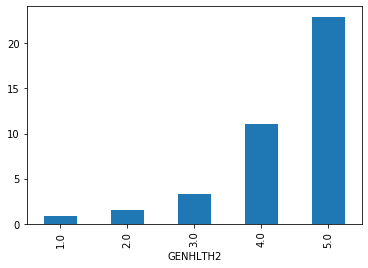

In [116]:
df.groupby('GENHLTH2')['PHYSHLTH2'].mean().sort_values().plot(kind = 'bar')

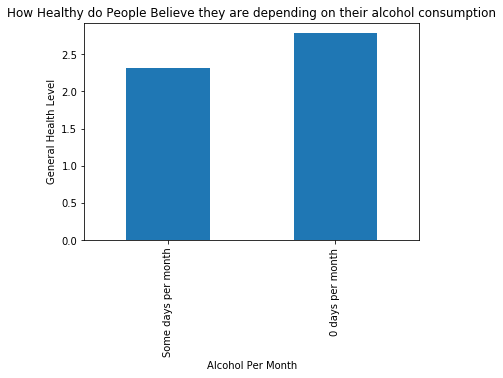

In [130]:
df.groupby('Alc_per_month_group')['GENHLTH2'].mean().sort_values().plot(kind = 'bar')
plt.xlabel('Alcohol Per Month')
plt.ylabel('General Health Level')
plt.title('How Healthy do People Believe they are depending on their alcohol consumption')
plt.show()

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. Smoking is worse for a person's health than drinking

2. People who are sick actually drink less since they're sick

3. New York Lifestyle actually makes people more sick

## Bonus: Create some cool graphics.  